In [1]:
# !pip install librosa

In [4]:
!pip show librosa

Name: librosa
Version: 0.10.1
Summary: Python module for audio and music processing
Home-page: https://librosa.org
Author: Brian McFee, librosa development team
Author-email: brian.mcfee@nyu.edu
License: ISC
Location: C:\Users\anasa\anaconda3\Lib\site-packages
Requires: audioread, decorator, joblib, lazy-loader, msgpack, numba, numpy, pooch, scikit-learn, scipy, soundfile, soxr, typing-extensions
Required-by: 


In [1]:
import librosa

def extract_features(audio_data, sr):
  """Extracts features from an audio file.

  Args:
    audio_data: A NumPy array containing the audio data.
    sr: The sample rate of the audio data.

  Returns:
    A dictionary containing the extracted features.
  """

  features = {}

  # Extract chroma features
  features["chroma_stft"] = librosa.feature.chroma_stft(y=audio_data, sr=sr)
  features["chroma_cqt"] = librosa.feature.chroma_cqt(y=audio_data, sr=sr)
  features["chroma_cens"] = librosa.feature.chroma_cens(y=audio_data, sr=sr)
#   features["chroma_vqt"] = librosa.feature.chroma_vqt(y=audio_data, sr=sr, intervals='eq')

  # Extract melspectrogram features
  features["melspectrogram"] = librosa.feature.melspectrogram(y=audio_data, sr=sr)

  # Extract MFCC features
  features["mfccs"] = librosa.feature.mfcc(y=audio_data, sr=sr)

  # Extract RMS features
  features["rms"] = librosa.feature.rms(y=audio_data)

  # Extract spectral centroid features
  features["spectral_centroid"] = librosa.feature.spectral_centroid(y=audio_data, sr=sr)

  # Extract spectral bandwidth features
  features["spectral_bandwidth"] = librosa.feature.spectral_bandwidth(y=audio_data, sr=sr)

  # Extract spectral contrast features
  features["spectral_contrast"] = librosa.feature.spectral_contrast(y=audio_data, sr=sr)

  # Extract spectral flatness features
  features["spectral_flatness"] = librosa.feature.spectral_flatness(y=audio_data)

  # Extract spectral rolloff features
  features["spectral_rolloff"] = librosa.feature.spectral_rolloff(y=audio_data, sr=sr)

  # Extract polynomial features
  features["poly_features"] = librosa.feature.poly_features(y=audio_data, sr=sr)

  # Extract tonnetz features
#   features["tonnetz"] = librosa.feature.tonnetz(chroma_stft=features["chroma_stft"])

  # Extract zero-crossing rate features
  features["zero_crossing_rate"] = librosa.feature.zero_crossing_rate(y=audio_data)

  return features


if __name__ == "__main__":
  # Load the audio file
  audio_data, sr = librosa.load('Track 4.wav')

  # Extract features
  features = extract_features(audio_data, sr)
  # Print the features
  for feature_name, feature_value in features.items():
    print(f"{feature_name}: {feature_value}\n\nShape : {feature_value.shape}\n")



C:\Users\anasa\anaconda3\Lib\site-packages\librosa\core\spectrum.py:257: UserWarning: n_fft=1024 is too large for input signal of length=992
  warnings.warn(


chroma_stft: [[0.         0.9273313  0.9985078  ... 0.76303566 0.9632147  0.        ]
 [0.         0.9295667  0.99659514 ... 0.8996322  0.9491392  0.        ]
 [0.         0.9756453  0.9895621  ... 0.74734896 0.93025774 0.        ]
 ...
 [0.         0.9057431  0.98195046 ... 1.         0.99740344 0.        ]
 [0.         0.8525833  0.9913117  ... 0.9306943  0.9889501  0.        ]
 [0.         0.99167126 1.         ... 0.7971123  0.9828219  0.        ]]

Shape : (12, 124)

chroma_cqt: [[0.255467   0.22080535 0.19233774 ... 0.16218024 0.1223198  0.16382869]
 [0.15632889 0.15454325 0.1607737  ... 0.12238987 0.09314599 0.12346017]
 [0.15281904 0.18353496 0.21956012 ... 0.11543174 0.08857667 0.15581422]
 ...
 [0.712105   0.72703606 0.7345002  ... 0.81622833 0.74187946 0.89050865]
 [0.84234405 0.7413726  0.76291394 ... 1.         1.         1.        ]
 [1.         1.         1.         ... 0.23930205 0.21132714 0.34922576]]

Shape : (12, 124)

chroma_cens: [[0.19974408 0.20307969 0.20625873

C:\Users\anasa\anaconda3\Lib\site-packages\librosa\core\spectrum.py:257: UserWarning: n_fft=1024 is too large for input signal of length=992
  warnings.warn(


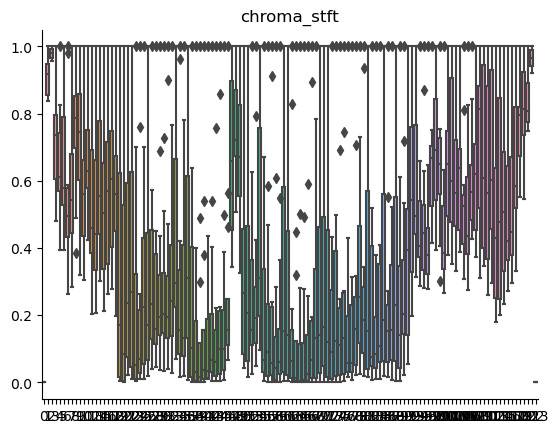

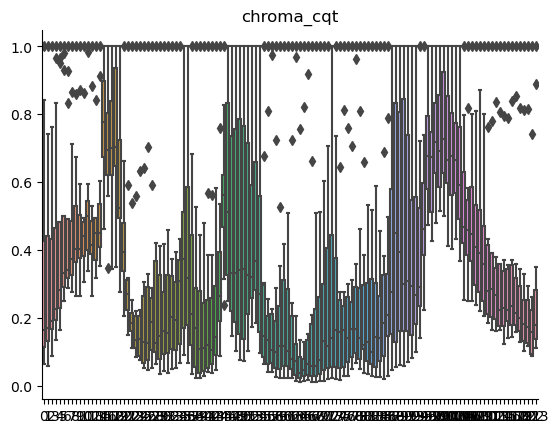

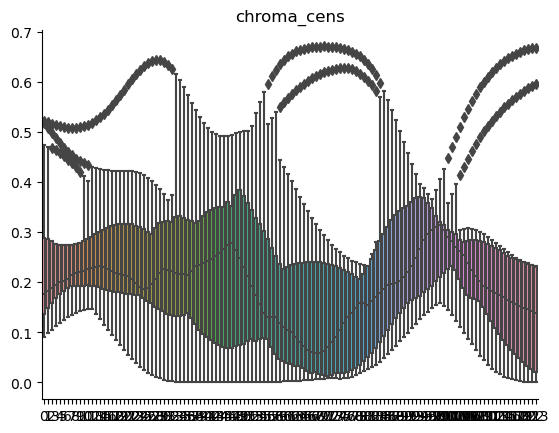

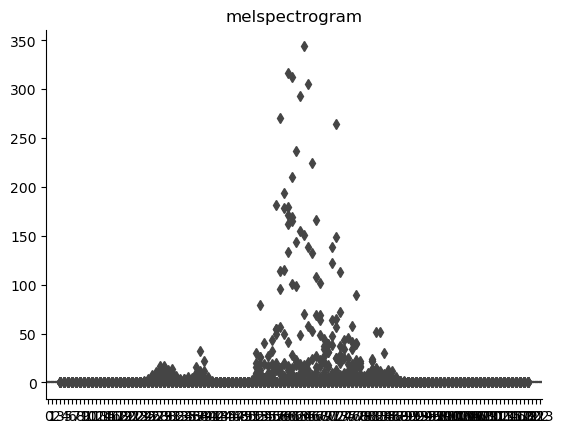

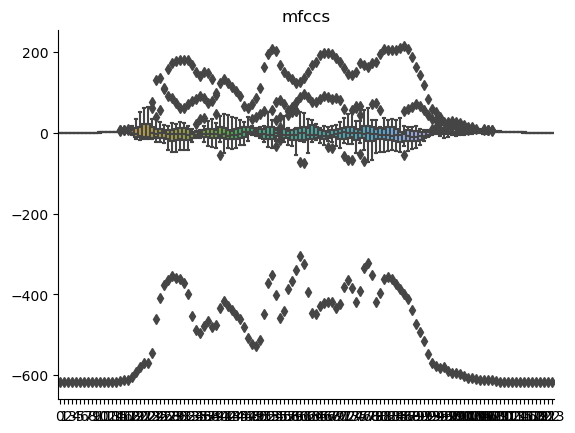

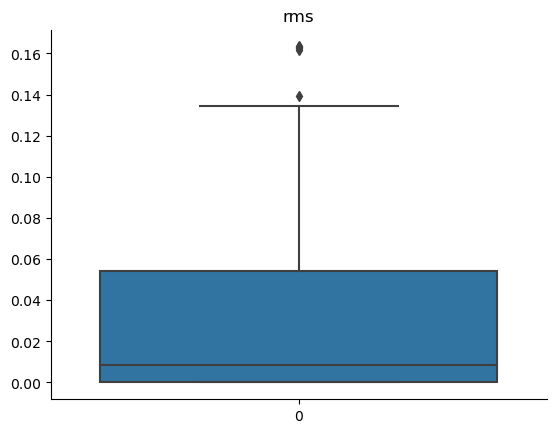

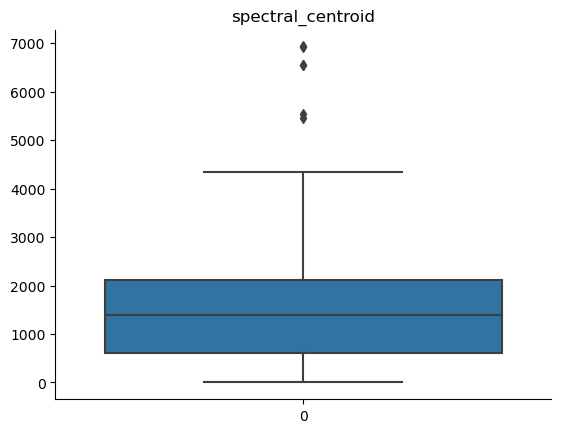

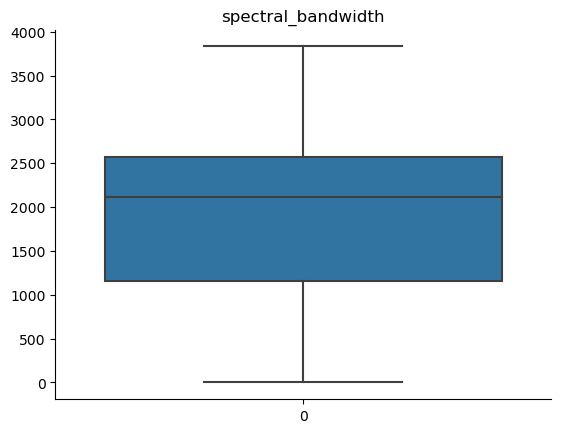

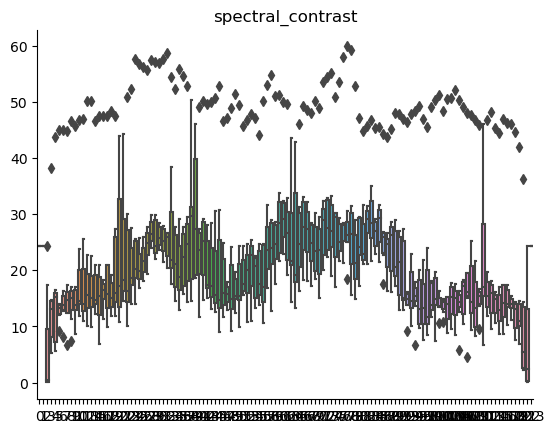

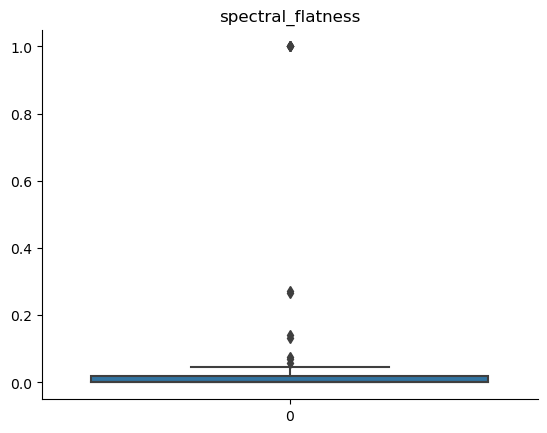

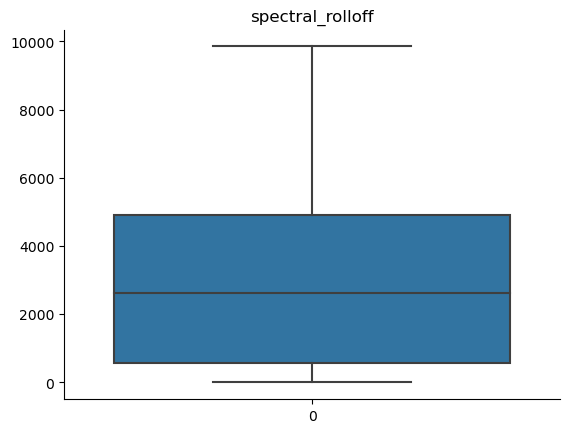

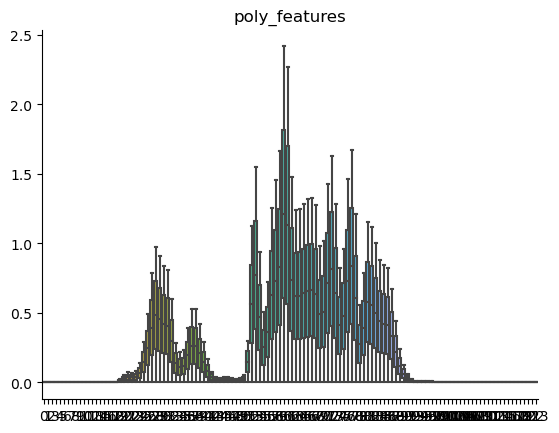

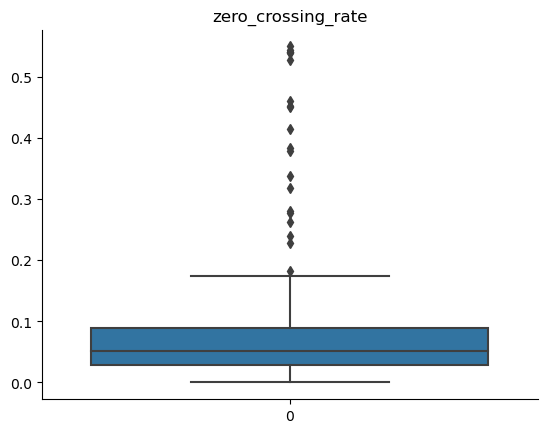

In [2]:
import librosa
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

def extract_features(audio_data, sr):
    """Extracts features from an audio file.

    Args:
        audio_data: A NumPy array containing the audio data.
        sr: The sample rate of the audio data.

    Returns:
        A dictionary containing the extracted features.
    """

    features = {}

    features["chroma_stft"] = librosa.feature.chroma_stft(y=audio_data, sr=sr)
    features["chroma_cqt"] = librosa.feature.chroma_cqt(y=audio_data, sr=sr)
    features["chroma_cens"] = librosa.feature.chroma_cens(y=audio_data, sr=sr)
    features["melspectrogram"] = librosa.feature.melspectrogram(y=audio_data, sr=sr)
    features["mfccs"] = librosa.feature.mfcc(y=audio_data, sr=sr)
    features["rms"] = librosa.feature.rms(y=audio_data)
    features["spectral_centroid"] = librosa.feature.spectral_centroid(y=audio_data, sr=sr)
    features["spectral_bandwidth"] = librosa.feature.spectral_bandwidth(y=audio_data, sr=sr)
    features["spectral_contrast"] = librosa.feature.spectral_contrast(y=audio_data, sr=sr)
    features["spectral_flatness"] = librosa.feature.spectral_flatness(y=audio_data)
    features["spectral_rolloff"] = librosa.feature.spectral_rolloff(y=audio_data, sr=sr)
    features["poly_features"] = librosa.feature.poly_features(y=audio_data, sr=sr)
    features["zero_crossing_rate"] = librosa.feature.zero_crossing_rate(y=audio_data)

    return features

def plot_boxplot(features):
    """Plots a boxplot of the given features.

    Args:
        features: A dictionary of features, where each key is the name of the feature
        and each value is a NumPy array containing the values of the feature.
    """

    for feature_name, feature_values in features.items():
        plt.figure()
        sns.boxplot(data=feature_values)
        plt.title(feature_name)
        sns.despine()

if __name__ == "__main__":
    audio_data, sr = librosa.load('Track 4.wav')
    features = extract_features(audio_data, sr)
    plot_boxplot(features)
    plt.show()


C:\Users\anasa\anaconda3\Lib\site-packages\librosa\core\spectrum.py:257: UserWarning: n_fft=1024 is too large for input signal of length=992
  warnings.warn(


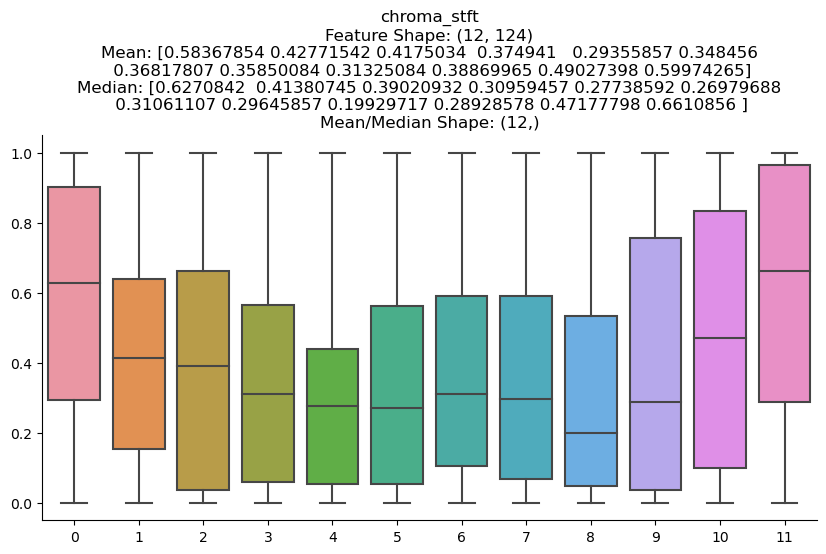

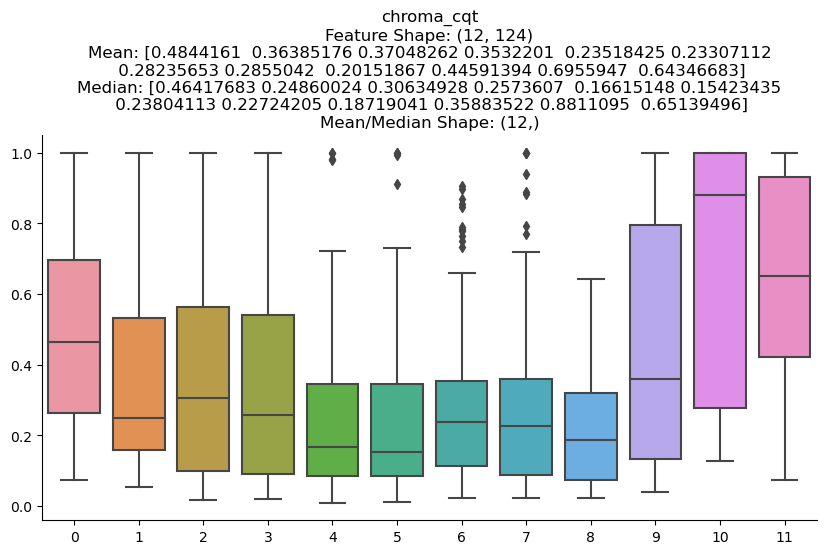

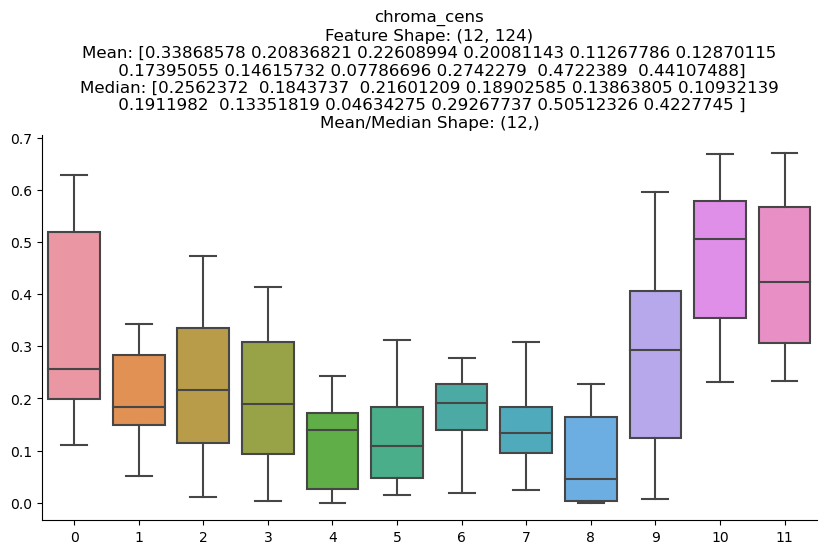

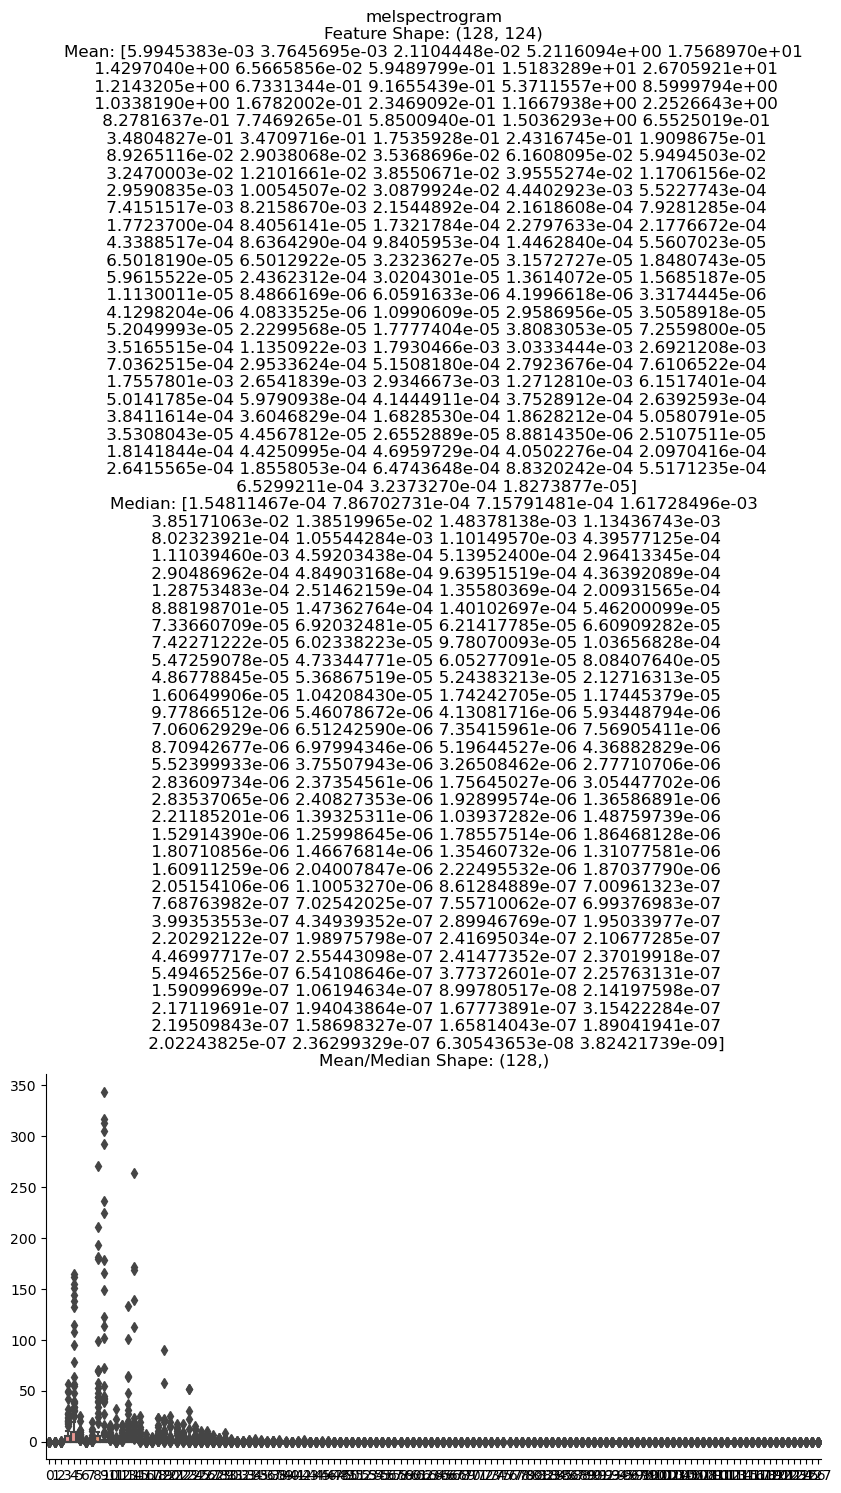

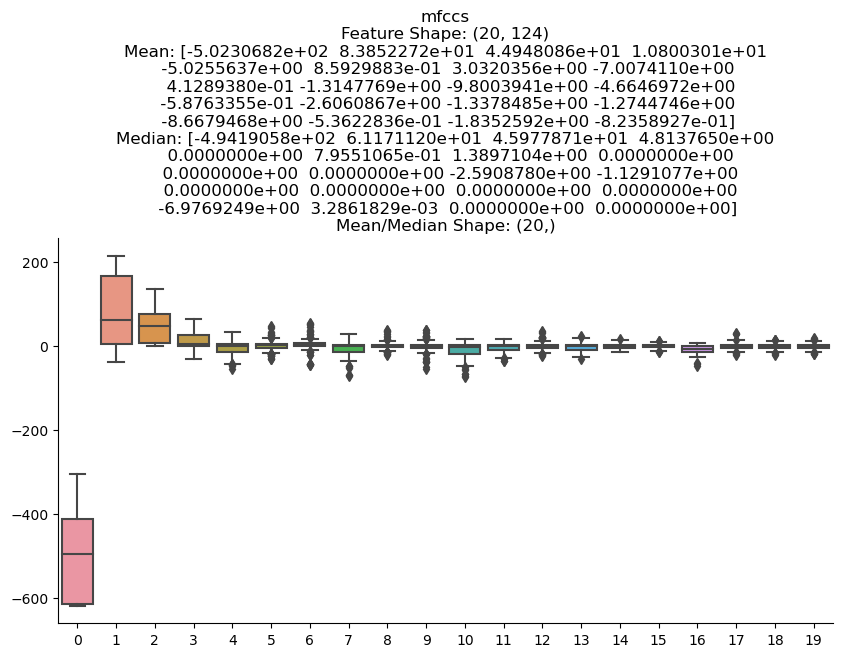

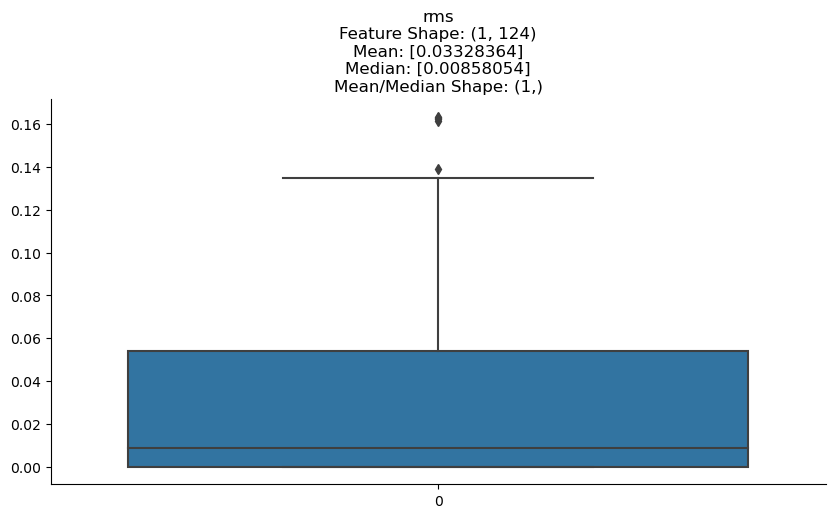

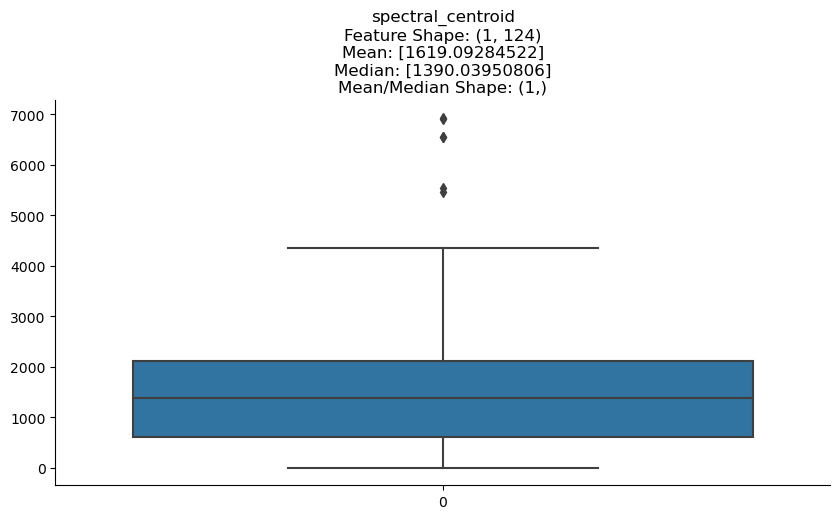

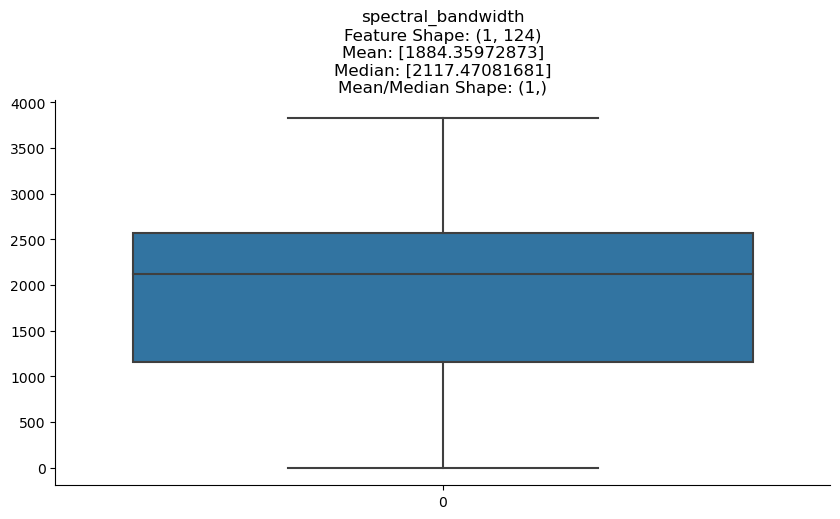

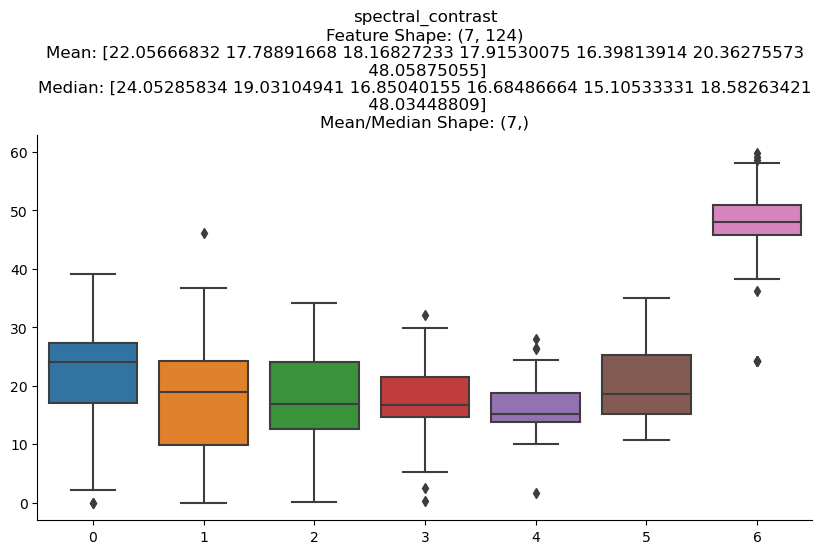

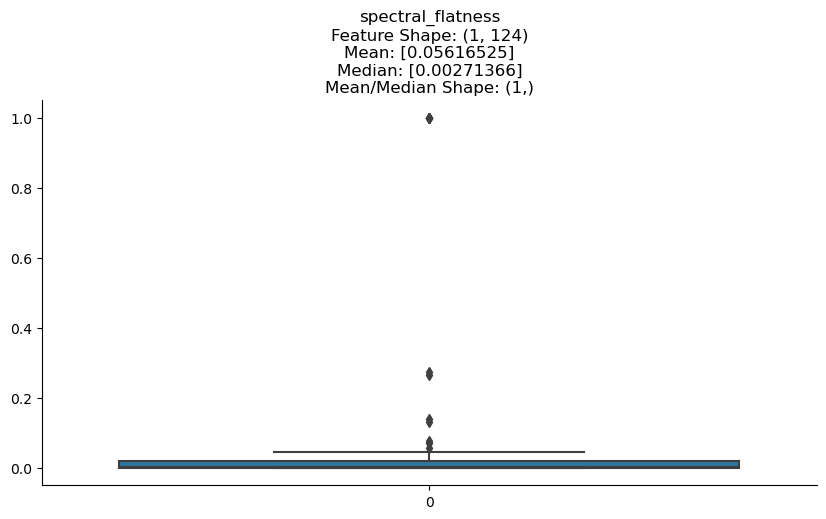

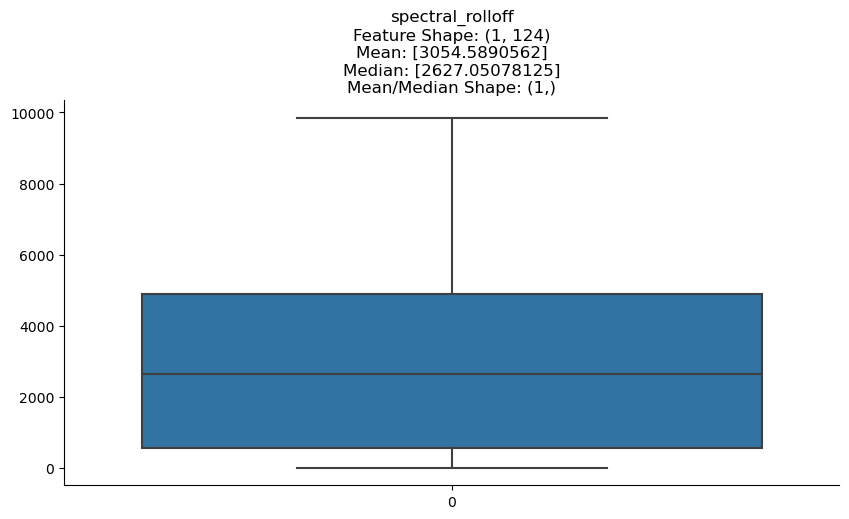

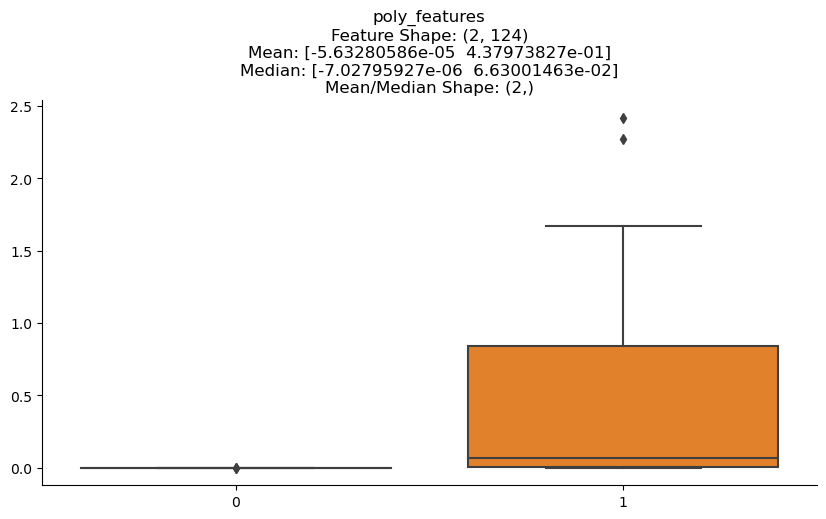

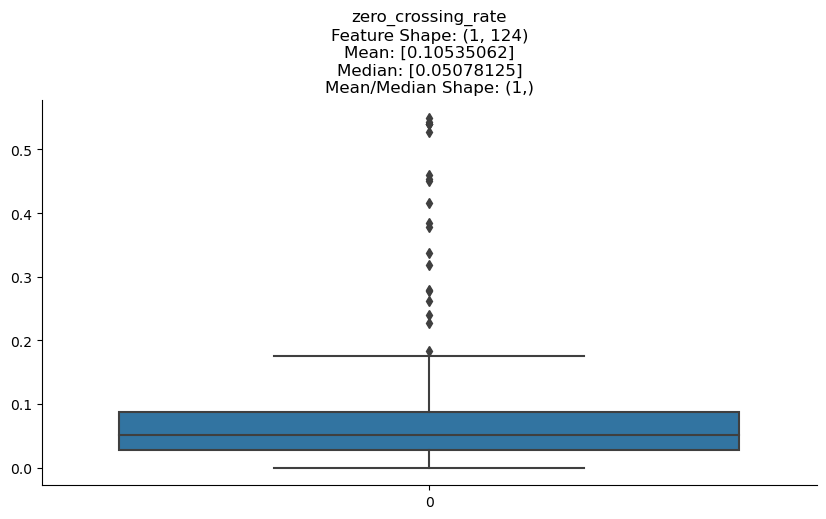

In [4]:
import librosa
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

def extract_features(audio_data, sr):
    features = {}
    features["chroma_stft"] = librosa.feature.chroma_stft(y=audio_data, sr=sr)
    features["chroma_cqt"] = librosa.feature.chroma_cqt(y=audio_data, sr=sr)
    features["chroma_cens"] = librosa.feature.chroma_cens(y=audio_data, sr=sr)
    features["melspectrogram"] = librosa.feature.melspectrogram(y=audio_data, sr=sr)
    features["mfccs"] = librosa.feature.mfcc(y=audio_data, sr=sr)
    features["rms"] = librosa.feature.rms(y=audio_data)
    features["spectral_centroid"] = librosa.feature.spectral_centroid(y=audio_data, sr=sr)
    features["spectral_bandwidth"] = librosa.feature.spectral_bandwidth(y=audio_data, sr=sr)
    features["spectral_contrast"] = librosa.feature.spectral_contrast(y=audio_data, sr=sr)
    features["spectral_flatness"] = librosa.feature.spectral_flatness(y=audio_data)
    features["spectral_rolloff"] = librosa.feature.spectral_rolloff(y=audio_data, sr=sr)
    features["poly_features"] = librosa.feature.poly_features(y=audio_data, sr=sr)
    features["zero_crossing_rate"] = librosa.feature.zero_crossing_rate(y=audio_data)
    return features

def plot_boxplot(features):
    for feature_name, feature_values in features.items():
        plt.figure(figsize=(10, 5))
        
        # Calculate mean and median
        feature_mean = np.mean(feature_values, axis=1)
        feature_median = np.median(feature_values, axis=1)
        # Plot boxplot
        sns.boxplot(data=feature_values.T)
        plt.title(f"{feature_name}\nFeature Shape: {feature_values.shape}\nMean: {feature_mean}\nMedian: {feature_median}\nMean/Median Shape: {feature_mean.shape}")
        sns.despine()

if __name__ == "__main__":
    audio_data, sr = librosa.load('Track 4.wav')
    features = extract_features(audio_data, sr)
    plot_boxplot(features)
    plt.show()


C:\Users\anasa\anaconda3\Lib\site-packages\librosa\core\spectrum.py:257: UserWarning: n_fft=1024 is too large for input signal of length=992
  warnings.warn(


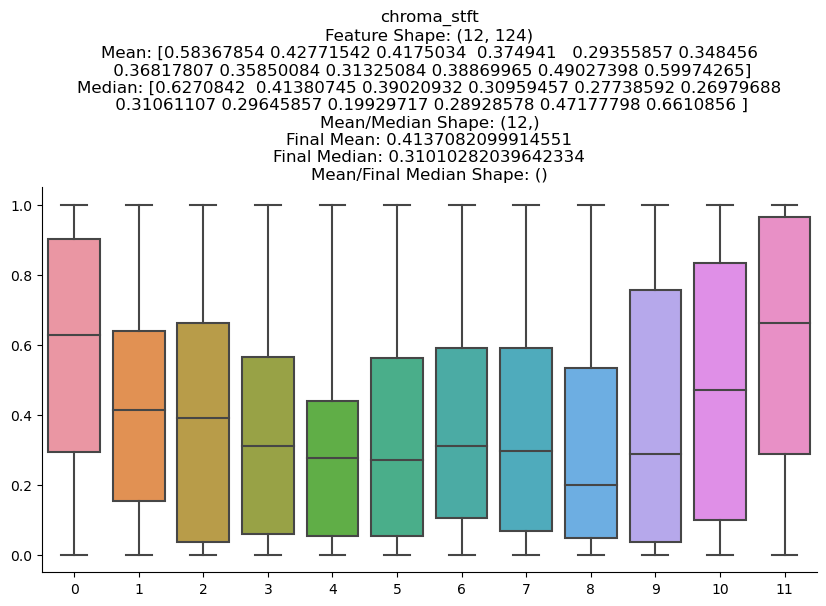

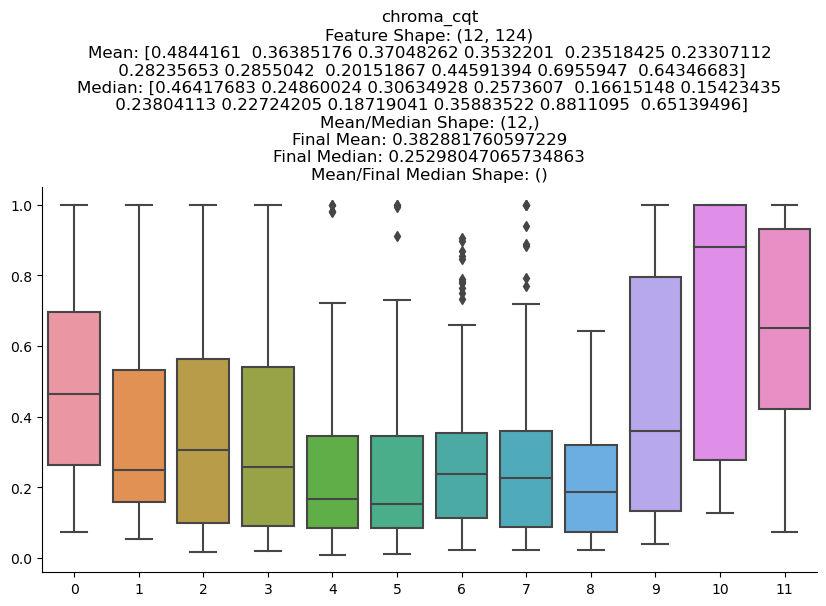

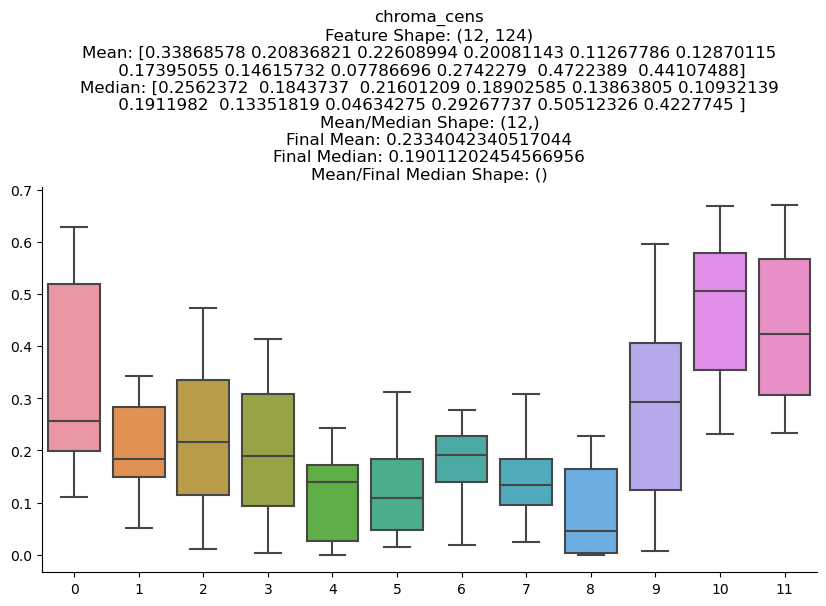

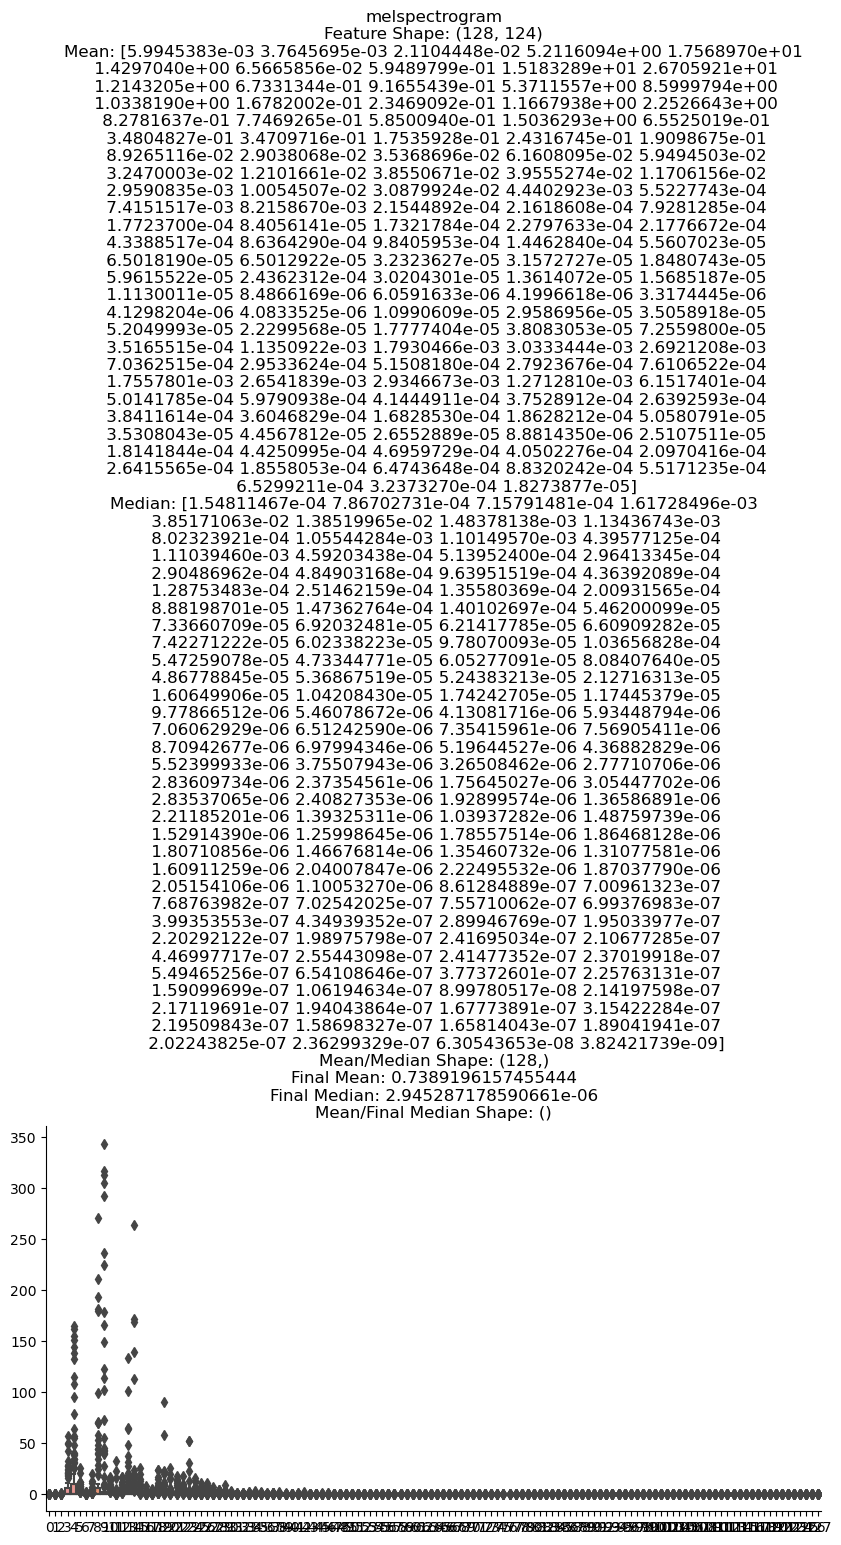

In [ ]:
import librosa
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

def extract_features(audio_data, sr):
    features = {}
    features["chroma_stft"] = librosa.feature.chroma_stft(y=audio_data, sr=sr)
    features["chroma_cqt"] = librosa.feature.chroma_cqt(y=audio_data, sr=sr)
    features["chroma_cens"] = librosa.feature.chroma_cens(y=audio_data, sr=sr)
    features["melspectrogram"] = librosa.feature.melspectrogram(y=audio_data, sr=sr)
    features["mfccs"] = librosa.feature.mfcc(y=audio_data, sr=sr)
    features["rms"] = librosa.feature.rms(y=audio_data)
    features["spectral_centroid"] = librosa.feature.spectral_centroid(y=audio_data, sr=sr)
    features["spectral_bandwidth"] = librosa.feature.spectral_bandwidth(y=audio_data, sr=sr)
    features["spectral_contrast"] = librosa.feature.spectral_contrast(y=audio_data, sr=sr)
    features["spectral_flatness"] = librosa.feature.spectral_flatness(y=audio_data)
    features["spectral_rolloff"] = librosa.feature.spectral_rolloff(y=audio_data, sr=sr)
    features["poly_features"] = librosa.feature.poly_features(y=audio_data, sr=sr)
    features["zero_crossing_rate"] = librosa.feature.zero_crossing_rate(y=audio_data)
    return features

def plot_boxplot(features):
    for feature_name, feature_values in features.items():
        plt.figure(figsize=(10, 5))
        
        # Calculate mean and median
        feature_mean = np.mean(feature_values, axis=1)
        Final_feature_mean=np.mean(feature_mean, axis=0)
        feature_median = np.median(feature_values, axis=1)
        final_feature_median=np.median(feature_median, axis=0)
        # Plot boxplot
        sns.boxplot(data=feature_values.T)
        plt.title(f"{feature_name}\nFeature Shape: {feature_values.shape}\nMean: {feature_mean}\nMedian: {feature_median}\nMean/Median Shape: {feature_mean.shape}\nFinal Mean: {Final_feature_mean}\nFinal Median: {final_feature_median}\nMean/Final Median Shape: {final_feature_median.shape}")
        sns.despine()

if __name__ == "__main__":
    audio_data, sr = librosa.load('Track 4.wav')
    features = extract_features(audio_data, sr)
    plot_boxplot(features)
    plt.show()
